In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_train=pd.read_csv('dataFashion.csv')
df_test=pd.read_csv('dataFashionTest.csv')

In [3]:
train_images=df_train.drop('label',axis=1).to_numpy().reshape((60000,28,28))
train_labels=df_train['label'].to_numpy()
test_images=df_test.drop('label',axis=1).to_numpy().reshape((10000,28,28))
test_labels=df_test['label'].to_numpy()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

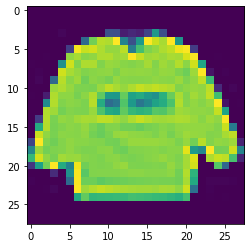

In [6]:
plt.imshow(train_images[0])

In [7]:
train_labels[0]

2

In [8]:
class_names[train_labels[0]]

'Pullover'

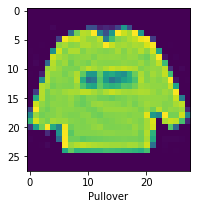

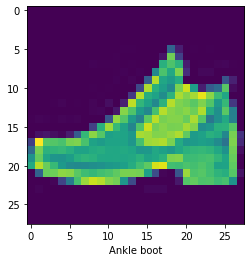

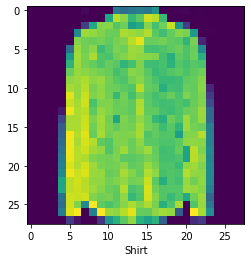

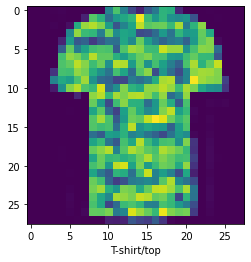

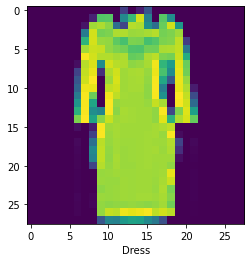

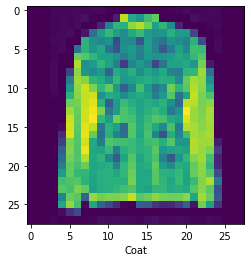

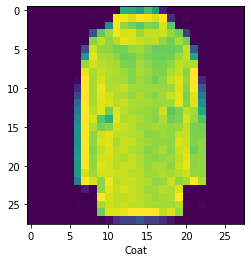

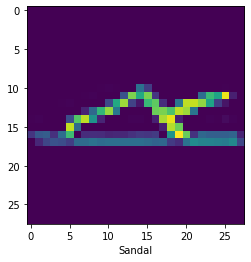

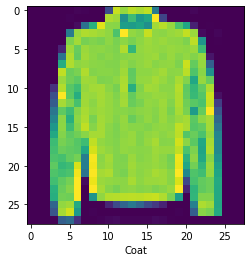

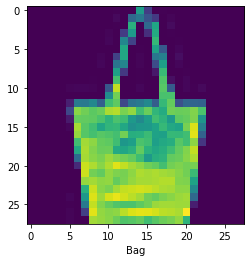

In [9]:
plt.figure(figsize=(3,3))
for i in range(10):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [10]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [11]:
layers = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]

model=keras.Sequential(layers)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4763 - accuracy: 0.8295
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3609 - accuracy: 0.8676
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3250 - accuracy: 0.8803
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2985 - accuracy: 0.8879
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2808 - accuracy: 0.8953


In [12]:
model.evaluate(test_images_scaled,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3015 - accuracy: 0.8889


[0.30154260993003845, 0.8888999819755554]

In [13]:
class_names[np.argmax(model.predict(test_images_scaled)[2])]

313/313 [==============================] - 2s 4ms/step


'Pullover'

In [14]:
class_names[test_labels[2]]

'Pullover'

In [15]:
y_pred = [np.argmax(element) for element in model.predict(test_images_scaled)]

313/313 [==============================] - 1s 4ms/step


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_pred,test_labels))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       876
           1       0.97      1.00      0.98       972
           2       0.80      0.83      0.81       955
           3       0.93      0.90      0.91      1029
           4       0.86      0.82      0.84      1049
           5       0.94      0.98      0.96       964
           6       0.76      0.68      0.72      1117
           7       0.91      0.95      0.93       961
           8       0.97      0.98      0.97       993
           9       0.98      0.90      0.94      1084

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Text(69.0, 0.5, 'Truth')

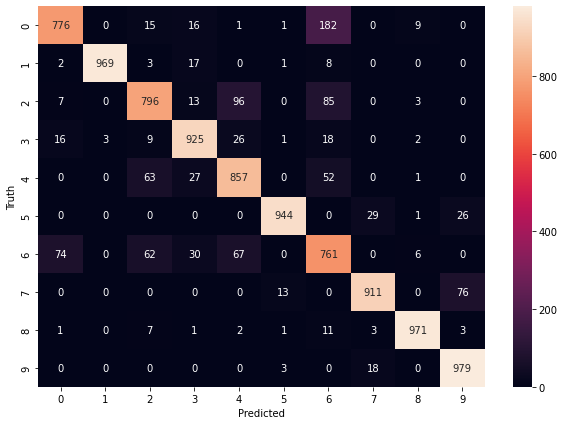

In [17]:
import seaborn as sn
cm = confusion_matrix(test_labels,y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')